# Random Forest
O algoritmo **Random Forest (RF)** consiste na combinação de vários classificadores fortes para criar um modelo mais robusto e preciso. Basicamente, árvores independentes de decisão são treinadas com o conjunto de dados em amostragens com reposição (**bootstrap sample**) com as linhas (**observações**) e colunas (**features**). A média das previsões dessas árvores, ou o valor mais frequente se torna a resposta final do modelo.

A maior **desvantagem** do algoritmo RF é a o seu alto custo computacional. Vamos observar o porquê disso.

## Alto Custo Computacional
Para entender o porquê do algoritmo RF ter um alto custo computacional, precisamos observar a sua **complexidade**. A complexidade do algoritmo RF pode ser quebrada em duas etapas: **construção** e **inferência**

### Complexidade na Construção
Na construção, várias árvores de decisão independentes são criadas, com a complexidade do treinamento de uma única árvore de decisão sendo **proporcional** ao número de amostras e features da base de dados. Então, para cada árvore a sua complexidade é dada por: $O(m \cdot n \cdot \log n)$. Como o algoritmo constroí uma quantidade $T$ de árvores, a complexidade final da etapa de construção é:

$$O(T \cdot m \cdot n \cdot \log n)$$

Onde:
- $T$ é o número de árvores construídas
- $m$ é o número de features da base de dados
- $n$ é o número de observações da base de dados
- $\log n$ é o fator de proporcionalidade para árvores balanceadas

Ou seja, quanto maior os valores de $T$, $m$ e $n$, mais poder de processamento será necessário para rodar o algoritmo.

### Complexidade na Inferência
Ao realizar previsões, o modelo passa a amostra por todas as árvores de decisão e agrega as previsões (por média, na caso de regressão, ou por votação, no caso de classificação). O tempo para realizar uma previsão para uma nova amostra em uma única árvore é dado por: $O(\log n)$. Como árvores balanceadas, cada decisão envolve uma comparação e a árvore é percorrida até a profundidade máxima. Para um número $T$ de árvores, a complexidade final da etapa de inferência é:

$$O(T \cdot \log n)$$

Portanto, a complexidade do algorimto **Random Forest (RF)** é linear ao número de árvores ($T$), número de características ($m$) e número de observações ($n$). A médida que esses valores crescem, maior se torna o custo computacional para rodar o algoritmo.

# Adapative Boosting Machine
O algoritmo **Adapative Boosting Machine (ABM)** consiste no treinamento sequencial de classificadores fracos (**weak leaners**), que são apenas um pouco melhores que pequenas árvores de decisão, para a criação de um classificador forte. As previsões de todos eles são combinadas através de voto majoritário ponderado (**weighted majority vote**) ou soma para produzir a resposta final do modelo. Os classificadores fracos são árvores compostas apenas pelo nó raiz e duas folhas, sendo chamadas de **stumps**. A cada etapa de modificação de dados (chamadas **boosting iteration**) são aplicados **pesos** para cada observação das amostras de treinamento com reposições (**bootstrap sample**). Inicialmente, todos os **pesos** são iguais a: $w_i = 1 / N$. Onde $N$ é o número de observações (linhas) da base de dados. Para cada iteração após a primeira, os pesos das observações são individualmente modificados com base na performance do melhor stump da iteração anterior, dado por:

$$w_i = w_i \cdot e^{(\pm \rho)}$$

Onde $\rho$ é a **performance** do stump, calculado pela expressão:

$$\rho = \frac{1}{2} \cdot \ln (\frac{QtdAcertos}{QtdErros})$$

O sinal de $\rho$ é positivo quando a previsão está incorreta e negativo quando está correta para cada observação individual. Dessa forma, o algoritmo aumenta os pesos das linhas (observações) com previsões incorretas e diminuí os pesos das demais linhas. Isso faz com que o modelo foque nos erros, permitindo refinar sua acurácia a cada iteração.

Ao final do processo de treino, os pesos são **normalizados** para que sua soma total seja igual a 1 e o processo é repetido na próxima iteração com os novos pesos. Os valores das **classes** são somados e a classe com a maior soma é a resposta final do modelo.

A maior **vantagem** do algoritmo ABM quando comparado ao RF é o seu baixo custo computacional. Vamos observar o porquê disso.

## Baixo Custo Computacional
Semelhante ao algoritmo **Random Forest**, a complexidade do algoritmo AB pode ser quebrada em duas etapas: **construção** e **inferência**.

### Complexidade na Construção
O **AdaBoost** utiliza múltiplos classificadores fracos e ajusta seus pesos para formar um classificador final forte. O treinamento do modelo consiste em treinar stumps de forma **sequencial**, ajustando o peso das amostras a cada rodada, de modo que as amostras classificadas incorretamente recebam maior peso nas rodadas subsequentes.

Para cada stump, a complexidade de treinamento é a mesma que a de treinar esse classificador em particular. Portanto, para um stump padrão, a complexidade será proporcional ao número de observações e features. Sendo a complexidade dada por $O (m \cdot n)$. Como o modelo treina um número $T$ de stumps, a complexidade final da etapa de construção é:

$$O(T \cdot m \cdot n)$$

Onde:
- $T$ é o número de árvores (stumps)
- $m$ é o número de features
- $n$ é o número de observações
  
Além disso, o algoritmo envolve o ajuste dos pesos das amostras após cada iteração, o que também exige $O(n)$ operações por iteração, mas isso não altera a ordem de complexidade dominante.

### Complexidade na Inferência
Durante a previsão, o AdaBoost faz com que cada stump contribuia com uma previsão ponderada para a decisão final. Para uma nova amostra, a previsão é obtida somando as previsões ponderadas de todos os $T$ classificadores. A complexidade desse processo é $O(m)$, como ele deve ser repetido para cada $T$, a complexidade final da etapa de inferência é:

$$O(T \cdot m)$$

Portanto, assim como o algoritmo de **Random Forest**, a complexidade do **AdaBoost** é linear ao número de árvores treinadas, observações e features. Contudo, o principal motivo do baixo custo computacional do algoritmo, quando comparado ao RF, é o fato dele criar árvores muito mais simples, o que simplifica muitas operações e agiliza o processo de construção e inferência do algoritmo.

# Comparação RF vs. ABM

## Complexidade
Algoritmo RF tem complexidade linear dividida em duas etaps:
- Complexidade na construção (treino) = $O(T \cdot m \cdot n \cdot \log n)$
- Complexidade na inferência (previsão) = $O(T \cdot \log n)$

Algoritmo ABM tem complexidade linear dividida em duas etapas:
- Complexidade na construção (treino) = $O(T \cdot m \cdot n)$
- Complexidade na inferência (previsão) = $O(T \cdot m)$

## Modelos
Algoritmo RF usa árvores de decisão **independentes** e **complexas** de profundidades variáveis para construir seus modelos.

Algoritmo ABM usa árvores de decisão **dependentes** e **simples** de profundidades constantes igual a **1** para construir seus modelos.

## Inferência
Algoritmo RF usa média ou votação majoritária para criar a resposta final.

Algoritmo ABM usa média ponderada ou votação majoritária ponderada para criar a resposta final.

## Sensibilidade
Algoritmo RF é mais robusto e menos propenso a **overfitting** por conta das árvores complexas que utiliza para o treinamento dos modelos.

Algoritmo ABM é mais sensível a ruídos e pode sofrer de **overfitting** mais facilmente, especialmente se houver outliers, por conta do ajuste de pesos de amostras mal classificadas, outliers podem receber pesos muito altos.

## Velocidade
Algoritmo RF leva mais tempo para ser treinado e consome mais recursos computacionais devido a complexidade dos seus modelos.

Algoritmo ABM leva menos tempo para ser treinado e consome menos recursos computacionais devido a simplicidade dos seus modelos.

# Implementação dos Algoritmos

In [1]:
from timeit import timeit

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score

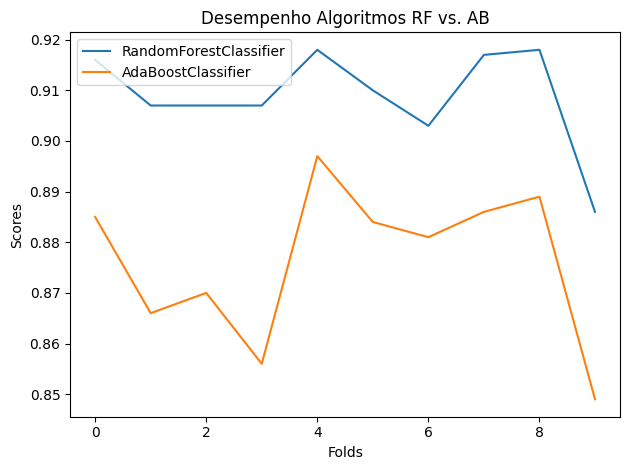

CPU times: total: 1min 48s
Wall time: 1min 47s


In [4]:
%%time
# Criando base de dados 
X, y = make_classification(n_samples=10000, random_state=412)

# Implementando Random Forest
rfc_model = RandomForestClassifier(n_estimators=100, random_state=412)
scores_rfc = cross_val_score(rfc_model, X, y, cv=10)

# Capturando tempo de execução do algoritmo
exet_rfc = timeit(stmt='cross_val_score(rfc_model, X, y, cv=10)', globals=globals(),  number=1)

# Implementando AdaBoost
abc_model = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=412)
scores_abc = cross_val_score(abc_model, X, y, cv=10)

# Capturando tempo de execução do algoritmo
exet_abc = timeit(stmt='cross_val_score(abc_model, X, y, cv=10)', globals=globals(),  number=1)

# Exbinido gráfico de linha comparativo
fig, ax = plt.subplots()

sns.lineplot(scores_rfc, ax=ax, label='RandomForestClassifier')
sns.lineplot(scores_abc, ax=ax, label='AdaBoostClassifier')

plt.xlabel('Folds')
plt.ylabel('Scores')
plt.title('Desempenho Algoritmos RF vs. ABC')

plt.tight_layout()
plt.show()

In [5]:
print(f'Score médio do algoritmo RandomForestClassifer: {scores_rfc.mean():.2f}\nScore médio do algoritmo AdaBoostClassifer: {scores_abc.mean():.2f}')
print(f'Tempo de execução algoritmo RandomForestClassifer: {exet_rfc:.2f} s\nTempo de execução algoritmo AdaBoostClassifier: {exet_abc:.2f} s')

Score médio do algoritmo RandomForestClassifer: 0.91
Score médio do algoritmo AdaBoostClassifer: 0.88
Tempo de execução algoritmo RandomForestClassifer: 30.51 s
Tempo de execução algoritmo AdaBoostClassifier: 23.48 s


# Conclusão
Como é possível observar acima, o algoritmo **RandomForestClassifier** possui uma precisão maior quando comparado ao algoritmo **AdaBoostClassifier**, no entanto, o tempo de execução dos algoritmos apresenta uma diferença considerável de aproximadamente 7 segundos. Ao lidar com bases de dados maiores, é provável que o **AdaBoostClassifier** seja capaz de executar mais rapidamente, portanto, ao criar modelos cujo foco é a velocidade alinhada a boa precisão, o algoritmo de AdaBoost é preferível ao algorimto RandomForest. 

Vale salientar, contudo, que é necessário conduzir uma análise do caso específico antes de decidir acatar o uso de um algoritmo ou outro. Sendo essa decisão tomada com o problema que o algoritmo deve resolver em mente.

# Hiper-parâmetros

Os cinco hiper-parâmetros mais importantes do algoritmo **AdaBoostClassifier** são:

**n_estimators**

Número de classificadores fracos a serem combinados. Um valor alto pode melhorar a precisão, mas pode levar a sobreajuste.

**learning_rate**

Taxa de ajuste dos pesos dos classificadores. Valores baixos exigem mais estimadores, enquanto valores altos podem causar sobreajuste.

**base_estimator**

Classificador fraco utilizado (padrão é uma árvore de decisão rasa). A escolha afeta o desempenho e a complexidade do modelo.

**algorithm**

Tipo de algoritmo de aumento de peso. "SAMME" é para multiclasse, enquanto "SAMME.R" é otimizado e mais eficiente.

**random_state**

Semente para o gerador de números aleatórios, garantindo que os resultados sejam reproduzíveis.